Data pre processing

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
mgc_df = pd.read_csv("MGC.csv")

In [8]:
mgc_df = mgc_df.rename(columns={"date": "datetime", "close":"mgc_close"})

In [13]:
mgc_df_close = mgc_df.loc[:, ["datetime", "mgc_close"]]

In [3]:
mes_df = pd.read_csv("MES.csv")

In [9]:
mes_df = mes_df.rename(columns={"date": "datetime", "close":"mes_close"})

In [15]:
mes_df_close = mes_df.loc[:, ["datetime", "mes_close"]]

In [4]:
jpy_df = pd.read_csv("JPY.csv")

In [10]:
jpy_df = jpy_df.rename(columns={"date": "datetime", "close":"jpy_close"})

In [16]:
jpy_df_close = jpy_df.loc[:, ["datetime", "jpy_close"]]

In [5]:
cl_df = pd.read_csv("CL.csv")

In [11]:
cl_df = cl_df.rename(columns={"date": "datetime", "close":"cl_close"})

In [17]:
cl_df_close = cl_df.loc[:, ["datetime", "cl_close"]]

In [18]:
summary_df = pd.merge(mgc_df_close, mes_df_close, on=['datetime'], how='outer').merge(jpy_df_close, on=['datetime'], how='outer').merge(cl_df_close, on=['datetime'], how='outer')

In [20]:
summary_df.loc[:, "datetime"] = pd.to_datetime(summary_df.loc[:, "datetime"])

In [21]:
summary_df = summary_df.sort_values("datetime")

In [24]:
summary_df.set_index("datetime", inplace=True)

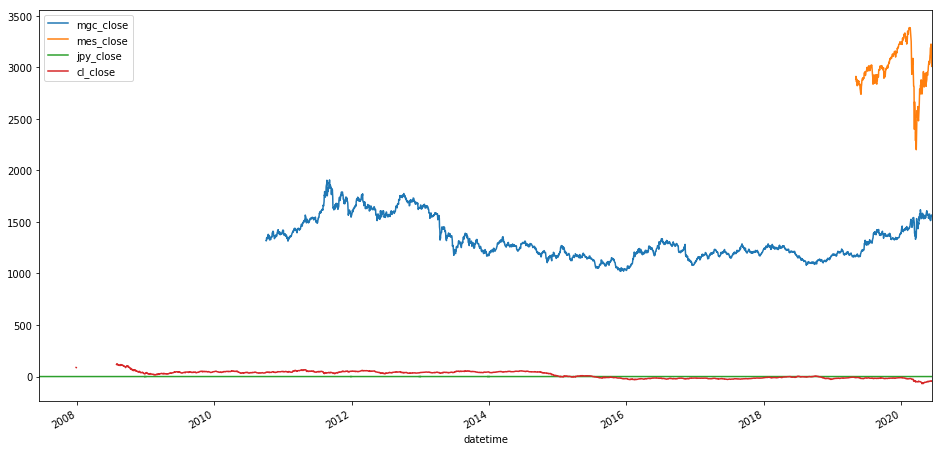

In [28]:
summary_df.plot(figsize=(16, 8))

In [31]:
summary_df.to_hdf("processed_data.h5", key="data")